<a href="https://colab.research.google.com/github/anas1IA/Learning_non_supervised-/blob/main/TP_non_supervised_clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- Importation des librairies de Python nécessaires

In [154]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

## 2-Chargement des données (trois classes)

In [155]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [156]:
data.shape

(150, 6)

In [157]:
df = data.drop('Id', axis=1)

In [158]:
column = df.columns[1:5]
column

Index(['SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

## 3-Visualisez les données


In [159]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

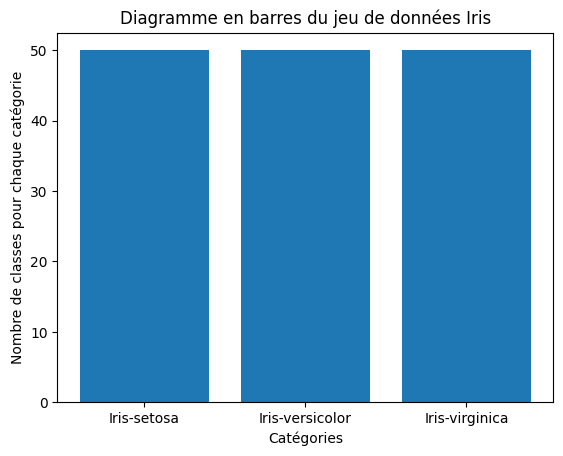

In [160]:

categories = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
valeurs = [50, 50, 50]

# Créer un diagramme en barres
plt.bar(categories, valeurs)

# Ajouter des étiquettes
plt.xlabel('Catégories')
plt.ylabel('Nombre de classes pour chaque catégorie')
plt.title('Diagramme en barres du jeu de données Iris')

# Afficher le diagramme
plt.show()


In [161]:
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


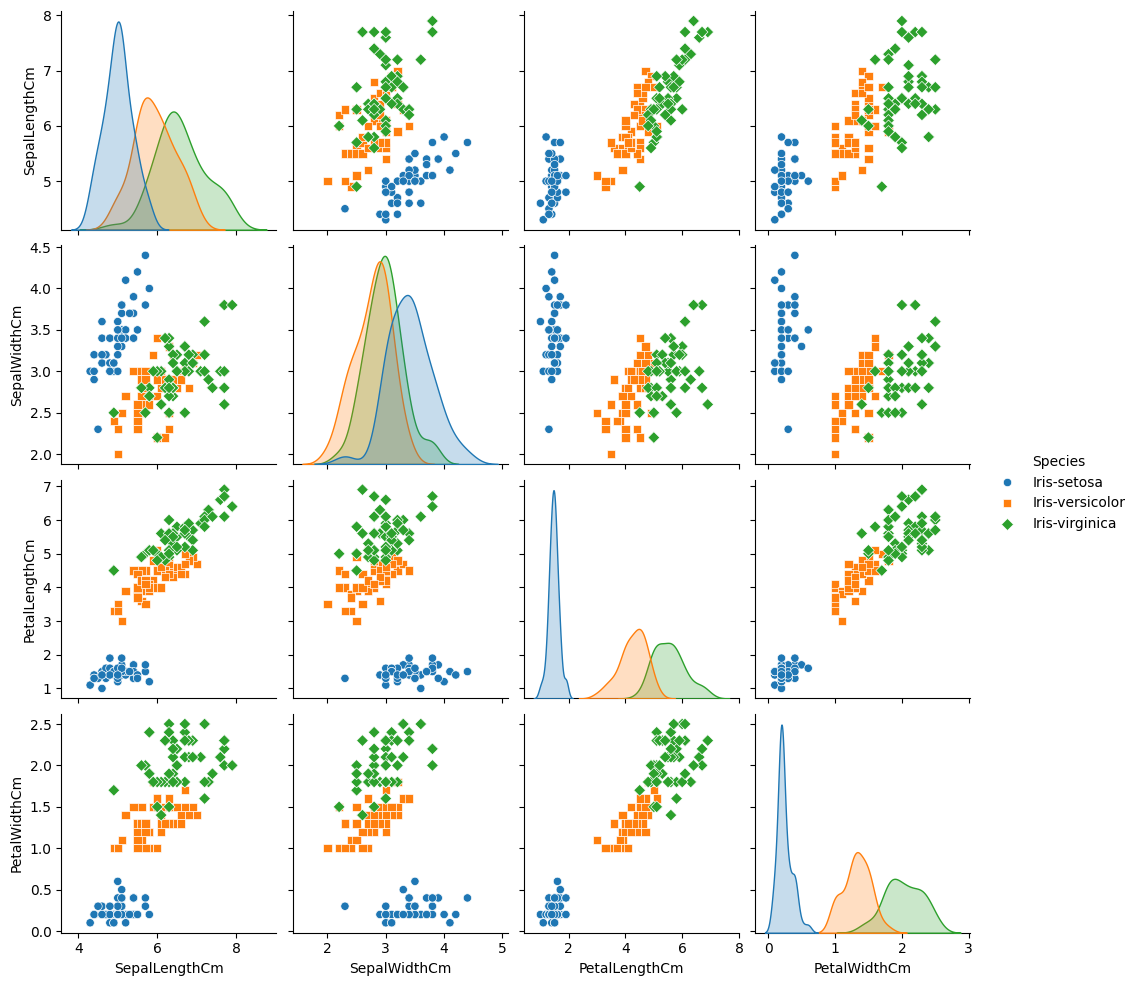

In [162]:
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.show()

## 4-Implémentez la matrice de dispersion de données, inter-classes et intra-classes.

In [163]:

# Séparer les données en fonction des classes (target)
classes = df['Species'].unique()
donnees_par_classe = {classe: df[df['Species'] == classe] for classe in classes}

# Calculer les moyennes de chaque classe
moyennes_par_classe = {classe: donnees.mean() for classe, donnees in donnees_par_classe.items()}

# Calculer la moyenne globale
moyenne_globale = df.drop('Species', axis=1).mean()

# Initialiser les matrices de dispersion intra-classes et inter-classes
SW = np.zeros((df.shape[1]-1, df.shape[1]-1))
SB = np.zeros((df.shape[1]-1, df.shape[1]-1))

# Calculer la matrice de dispersion intra-classes (SW)
for classe, donnees in donnees_par_classe.items():
    for index, ligne in donnees.drop('Species', axis=1).iterrows():
        x_minus_mu = np.array(ligne) - np.array(moyennes_par_classe[classe])
        SW += np.outer(x_minus_mu, x_minus_mu)

# Calculer la matrice de dispersion inter-classes (SB)
for classe in classes:
    n = len(donnees_par_classe[classe])
    mu_minus_muG = np.array(moyennes_par_classe[classe]) - np.array(moyenne_globale)
    SB += n * np.outer(mu_minus_muG, mu_minus_muG)

# Afficher les matrices de dispersion



<ipython-input-163-fbc847c31529>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  moyennes_par_classe = {classe: donnees.mean() for classe, donnees in donnees_par_classe.items()}
<ipython-input-163-fbc847c31529>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  moyennes_par_classe = {classe: donnees.mean() for classe, donnees in donnees_par_classe.items()}
<ipython-input-163-fbc847c31529>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, 

In [164]:

print("\nMatrice de dispersion inter-classes (SB):\n", SB)


Matrice de dispersion inter-classes (SB):
 [[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]


In [165]:
print("Matrice de dispersion intra-classes (SW):\n", SW)

Matrice de dispersion intra-classes (SW):
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


## 5-mplémentez l’inertie intra-classes et l’inertie inter-classes :
Pour calculer l'inertie intra-classes (intra-cluster variance) et l'inertie inter-classes (inter-cluster variance) à partir des matrices de dispersion que nous avons calculées précédemment, vous pouvez utiliser les formules suivantes :

$
\text{Inertie intra-classes (W)} = \text{trace}(SW)
 $


$
\text{Inertie inter-classes (B)} = \text{trace}(SB)
$

In [166]:
inertie_intra_classes = np.trace(SW)

# Calculer l'inertie inter-classes (B) à partir de la matrice de dispersion inter-classes (SB)
inertie_inter_classes = np.trace(SB)

# Afficher les résultats

In [167]:

print("Inertie inter-classes (B):", inertie_inter_classes)

Inertie inter-classes (B): 591.4376


In [168]:
print("Inertie intra-classes (W):", inertie_intra_classes)

Inertie intra-classes (W): 89.3868


## 6-Implémentez l’indice de Dunn, de Davies-Bouldin et de Silhouette.
### Indice de Dunn

$
\text{Dunn Index} = \frac{\text{Min inter-cluster distance}}{\text{Max intra-cluster diameter}}
$

### Indice de Davies-Bouldin

$
\text{Davies-Bouldin Index} = \frac{\sum_{i=1}^{n} \max_{j\neq i}(\text{similarity}(i, j))}{n}
$

### Indice de Silhouette

$
\text{Silhouette Score} = \frac{b - a}{\max(a, b)}
$

où \(a\) est la distance moyenne intra-cluster, \(b\) est la distance moyenne inter-cluster.

### Exemple Numérique

Considérons trois clusters A, B et C dans un espace 2D. Les centroïdes des clusters sont \(C_A(2, 3)\), \(C_B(8, 6)\), et \(C_C(5, 10)\). Les points dans les clusters sont \(A(1, 2), (2, 3), (3, 4)\), \(B(7, 5), (8, 6), (9, 7)\), et \(C(4, 9), (5, 10), (6, 11)\).


In [169]:


def calculate_dunn_index(cluster_centers, labels, distance_metric='euclidean'):
    """
    Calculate the Dunn index for a clustering.

    Parameters:
    - cluster_centers: ndarray, shape (n_clusters, n_features)
        The cluster centers.
    - labels: array-like, shape (n_samples,)
        The labels of each sample.
    - distance_metric: string, optional, default: 'euclidean'
        The distance metric to use.

    Returns:
    - dunn_index: float
        The Dunn index.
    """
    num_clusters = len(cluster_centers)
    max_diameter = 0

    for i in range(num_clusters):
        cluster_i_points = np.array([cluster_centers[i]])
        for j in range(num_clusters):
            if i != j:
                cluster_j_points = np.array([cluster_centers[j]])
                distances = pairwise_distances(cluster_i_points, cluster_j_points, metric=distance_metric)
                max_diameter = max(max_diameter, np.max(distances))

    min_inter_cluster_distance = np.inf
    for i in range(num_clusters):
        cluster_i_points = np.array([point for point, label in zip(cluster_centers, labels) if label == i])
        for j in range(num_clusters):
            if i != j:
                cluster_j_points = np.array([point for point, label in zip(cluster_centers, labels) if label == j])
                distances = pairwise_distances(cluster_i_points, cluster_j_points, metric=distance_metric)
                min_inter_cluster_distance = min(min_inter_cluster_distance, np.min(distances))

    dunn_index = min_inter_cluster_distance / max_diameter
    return dunn_index

def calculate_silhouette_score(data, labels, distance_metric='euclidean'):
    """
    Calculate the Silhouette score for a clustering.

    Parameters:
    - data: array-like or pd.DataFrame, shape (n_samples, n_features)
        The data.
    - labels: array-like, shape (n_samples,)
        The labels of each sample.
    - distance_metric: string, optional, default: 'euclidean'
        The distance metric to use.

    Returns:
    - silhouette_score_value: float
        The Silhouette score.
    """
    silhouette_score_value = silhouette_score(data, labels, metric=distance_metric)
    return silhouette_score_value

def calculate_davies_bouldin_index(data, labels, distance_metric='euclidean'):
    """
    Calculate the Davies-Bouldin index for a clustering.

    Parameters:
    - data: array-like or pd.DataFrame, shape (n_samples, n_features)
        The data.
    - labels: array-like, shape (n_samples,)
        The labels of each sample.
    - distance_metric: string, optional, default: 'euclidean'
        The distance metric to use.

    Returns:
    - davies_bouldin_index: float
        The Davies-Bouldin index.
    """
    davies_bouldin_index = davies_bouldin_score(data, labels)
    return davies_bouldin_index


In [170]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [171]:
X = df.drop("Species", axis=1)

In [172]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [176]:
#
# Appliquer KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)
print(labels)


cluster_centers = kmeans.cluster_centers_
print(cluster_centers)

# Calculer les indices

silhouette_score_value = calculate_silhouette_score(X, labels)
davies_bouldin_index = calculate_davies_bouldin_index(X, labels)
label1=[i for i in range(cluster_centers.shape[0])]
dunn_index = calculate_dunn_index(cluster_centers , label1)
# Afficher les résultats




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [177]:
print("Davies-Bouldin Index:", davies_bouldin_index)

Davies-Bouldin Index: 0.662322864989869


In [178]:
print("Silhouette Score:", silhouette_score_value)

Silhouette Score: 0.5525919445499757


In [179]:
print("Dunn Index:", dunn_index)

Dunn Index: 0.35829738472901823
